# "Tree" regression


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Decision Tree

In [23]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [24]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

data = {
    "MSE Train": [MSE_train],
    "MSE Test": [MSE_test],
    "R2 Train": [R2_train],
    "R2 Test": [R2_test],
}
dft = pd.DataFrame(data=data)
display(dft)

,MSE Train,MSE Test,R2 Train,R2 Test
0,23.5159,31.578199,0.722574,0.620753


Text(0.5, 1.0, 'Train')

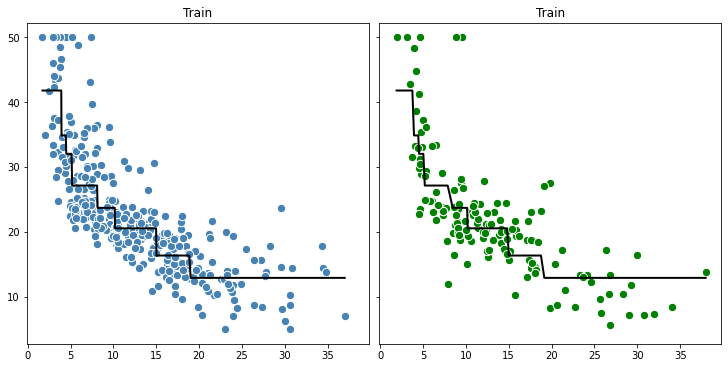

In [25]:
# Plotting

# Indices for sorting during plotting
idx_train = np.argsort(X_train, axis=0).ravel()
idx_test = np.argsort(X_test, axis=0).ravel()

# Plot regression curve
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
axs[0].scatter(X_train, y_train, c="steelblue", edgecolor="white", s=70)
axs[0].plot(X_train[idx_train,:1], y_train_pred[idx_train], color="black", lw=2)
axs[0].set_title("Train")

axs[1].scatter(X_test, y_test, c="green", edgecolor="white", s=70)
axs[1].plot(X_test[idx_test,:1], y_test_pred[idx_test], color="black", lw=2)
axs[1].set_title("Train")

Text(0.5, 1.0, 'Test')

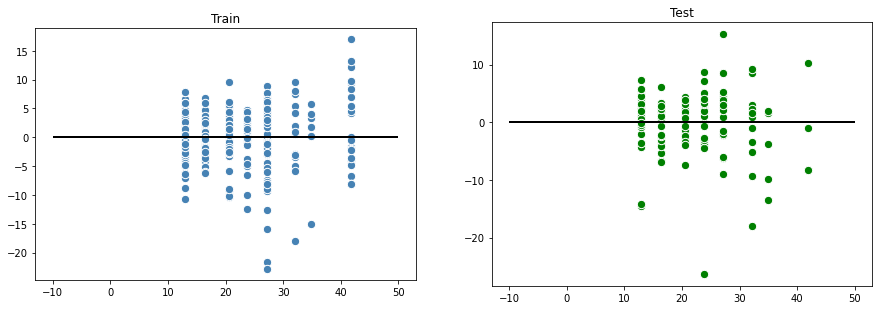

In [26]:
# Plot residual
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.scatter(y_train_pred, y_train_pred - y_train, c="steelblue", marker="o", edgecolor="white", s=70)
ax1.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax1.axes.set_aspect("equal")
ax1.set_title('Train')

ax2.scatter(y_test_pred, y_test_pred - y_test, c="green", marker="o", edgecolor="white", s=70)
ax2.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax2.axes.set_aspect("equal")
ax2.set_title('Test')

# Random Forest

In [27]:
forest = RandomForestRegressor(n_estimators=10, criterion="mse", random_state=1, n_jobs=-1, max_depth=None)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [28]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

data = {
    "MSE Train": [MSE_train],
    "MSE Test": [MSE_test],
    "R2 Train": [R2_train],
    "R2 Test": [R2_test],
}
dft = pd.DataFrame(data=data)
display(dft)

,MSE Train,MSE Test,R2 Train,R2 Test
0,8.187137,38.623326,0.903413,0.536143


Text(0.5, 1.0, 'Train')

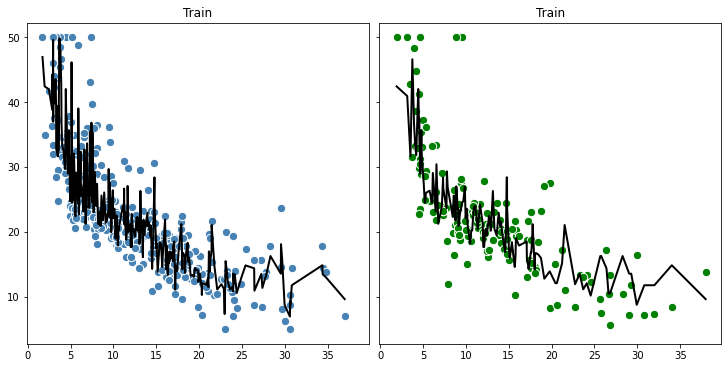

In [29]:
# Plotting

# Indices for sorting during plotting
idx_train = np.argsort(X_train, axis=0).ravel()
idx_test = np.argsort(X_test, axis=0).ravel()

# Plot regression curve
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
axs[0].scatter(X_train, y_train, c="steelblue", edgecolor="white", s=70)
axs[0].plot(X_train[idx_train,:1], y_train_pred[idx_train], color="black", lw=2)
axs[0].set_title("Train")

axs[1].scatter(X_test, y_test, c="green", edgecolor="white", s=70)
axs[1].plot(X_test[idx_test,:1], y_test_pred[idx_test], color="black", lw=2)
axs[1].set_title("Train")

Text(0.5, 1.0, 'Test')

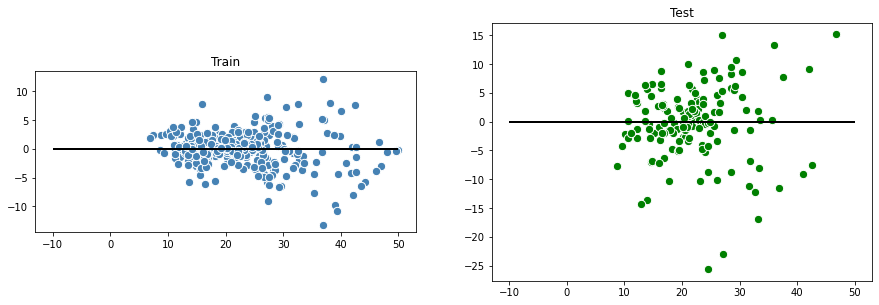

In [30]:
# Plot residual
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.scatter(y_train_pred, y_train_pred - y_train, c="steelblue", marker="o", edgecolor="white", s=70)
ax1.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax1.axes.set_aspect("equal")
ax1.set_title('Train')

ax2.scatter(y_test_pred, y_test_pred - y_test, c="green", marker="o", edgecolor="white", s=70)
ax2.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax2.axes.set_aspect("equal")
ax2.set_title('Test')